## **Downloading Bitcoin Price Data**

In [ ]:
import yfinance as yf
import os
import pandas as pd

In [ ]:
from flask import Flask, jsonify

In [ ]:
btc_ticker = yf.Ticker("BTC-USD")

In [ ]:
btc = btc_ticker.history(period="max")

In [ ]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-08 00:00:00+00:00,96533.257812,96877.804688,95702.492188,96482.453125,22447526395,0.0,0.0
2025-02-09 00:00:00+00:00,96481.312500,97325.281250,94745.257812,96500.093750,27732901800,0.0,0.0
2025-02-10 00:00:00+00:00,96499.460938,98333.218750,95320.843750,97437.554688,40078962391,0.0,0.0


In [ ]:
btc.index = pd.to_datetime(btc.index)

In [ ]:
btc.index = btc.index.tz_convert(None)

In [ ]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-08,96533.257812,96877.804688,95702.492188,96482.453125,22447526395,0.0,0.0
2025-02-09,96481.312500,97325.281250,94745.257812,96500.093750,27732901800,0.0,0.0
2025-02-10,96499.460938,98333.218750,95320.843750,97437.554688,40078962391,0.0,0.0


In [ ]:
del btc["Dividends"]
del btc["Stock Splits"]

<Axes: xlabel='Date'>

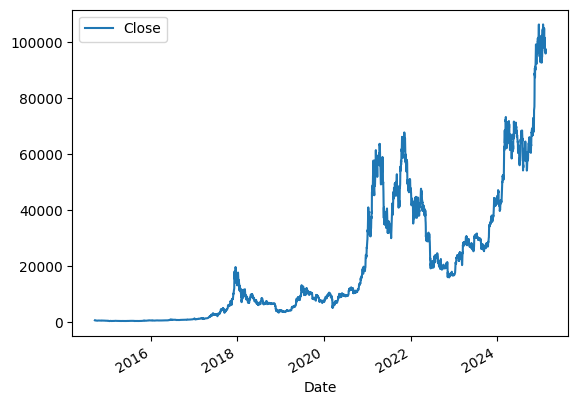

In [ ]:
btc.plot.line(y="Close", use_index=True)

In [ ]:
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [ ]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2025-01-25,0.300000,-0.052062,0.105556
2025-01-26,0.433333,-0.085247,0.138889
2025-01-27,0.533333,-0.118309,0.172222
2025-01-28,0.566667,-0.098553,0.172222


## **Preparing Data fro Machine Learning**

In [ ]:
btc = btc.merge(wiki, left_index=True, right_index=True)

In [ ]:
btc

,Open,High,Low,Close,Volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...
2025-01-25,104824.031250,105243.789062,104120.375000,104714.648438,23888996502,0.300000,-0.052062,0.105556
2025-01-26,104713.210938,105438.648438,102507.710938,102682.500000,22543395879,0.433333,-0.085247,0.138889
2025-01-27,102680.304688,103214.109375,97795.937500,102087.687500,89006608428,0.533333,-0.118309,0.172222
2025-01-28,102095.414062,103730.820312,100238.187500,101332.476562,47180685494,0.566667,-0.098553,0.172222


In [ ]:
btc["Tomorrow"] = btc["Close"].shift(-1)

In [ ]:
btc

,Open,High,Low,Close,Volume,edit_count,sentiment,neg_sentiment,Tomorrow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008
...,...,...,...,...,...,...,...,...,...
2025-01-25,104824.031250,105243.789062,104120.375000,104714.648438,23888996502,0.300000,-0.052062,0.105556,102682.500000
2025-01-26,104713.210938,105438.648438,102507.710938,102682.500000,22543395879,0.433333,-0.085247,0.138889,102087.687500
2025-01-27,102680.304688,103214.109375,97795.937500,102087.687500,89006608428,0.533333,-0.118309,0.172222,101332.476562
2025-01-28,102095.414062,103730.820312,100238.187500,101332.476562,47180685494,0.566667,-0.098553,0.172222,103703.210938


In [ ]:
btc["Target"] = (btc["Tomorrow"] > btc["Close"]).astype(int)

In [ ]:
btc

,Open,High,Low,Close,Volume,edit_count,sentiment,neg_sentiment,Tomorrow,Target
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1
...,...,...,...,...,...,...,...,...,...,...
2025-01-25,104824.031250,105243.789062,104120.375000,104714.648438,23888996502,0.300000,-0.052062,0.105556,102682.500000,0
2025-01-26,104713.210938,105438.648438,102507.710938,102682.500000,22543395879,0.433333,-0.085247,0.138889,102087.687500,0
2025-01-27,102680.304688,103214.109375,97795.937500,102087.687500,89006608428,0.533333,-0.118309,0.172222,101332.476562,0
2025-01-28,102095.414062,103730.820312,100238.187500,101332.476562,47180685494,0.566667,-0.098553,0.172222,103703.210938,1


In [ ]:
btc["Target"].value_counts()

,count
Target,
1,2003
0,1785


## **Training Our Baseline Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

In [ ]:
train = btc.iloc[:-200]
test = btc.iloc[-200:]

In [ ]:
predictors = ["Close", "Volume", "Open", "High", "Low", "edit_count", "sentiment", "neg_sentiment"]

In [ ]:
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5

## **Evaluating Error with Backtesting**

In [ ]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [ ]:
def backtest(data, model, predictors, start=1095, step=150):
  all_predictions=[]

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)

  return pd.concat(all_predictions)

## **XGBoost Model**

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [ ]:
precision_score(predictions["Target"], predictions["predictions"])

0.5033557046979866

## **Improving precision with trends**

In [ ]:
def compute_rolling(btc):
  horizons=[2,7,60,365]
  new_predictors = ["Close", "sentiment", "neg_sentiment"]

  for horizon in horizons:
    rolling_averages = btc.rolling(horizon, min_periods=1).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    btc[ratio_column] = btc["Close"] / rolling_averages["Close"]

    edit_column = f"edit_{horizon}"
    btc[edit_column] = rolling_averages["edit_count"]

    rolling = btc.rolling(horizon, closed="left", min_periods=1).mean()
    trend_column = f"trend_{horizon}"
    btc[trend_column] = rolling["Target"]

    new_predictors += [ratio_column, trend_column, edit_column]

  return btc, new_predictors

In [ ]:
btc, new_predictors = compute_rolling(btc)

In [ ]:
btc

,Open,High,Low,Close,Volume,edit_count,sentiment,neg_sentiment,Tomorrow,Target,...,trend_2,Close_Ratio_7,edit_7,trend_7,Close_Ratio_60,edit_60,trend_60,Close_Ratio_365,edit_365,trend_365
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0,...,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0,...,0.0,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1,...,0.0,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0,...,0.5,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1,...,0.5,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-25,104824.031250,105243.789062,104120.375000,104714.648438,23888996502,0.300000,-0.052062,0.105556,102682.500000,0,...,0.5,1.009090,0.300000,0.571429,1.062449,0.548889,0.550000,1.498377,0.484018,0.531507
2025-01-26,104713.210938,105438.648438,102507.710938,102682.500000,22543395879,0.433333,-0.085247,0.138889,102087.687500,0,...,0.0,0.987341,0.319048,0.571429,1.040648,0.545556,0.533333,1.465818,0.484018,0.528767
2025-01-27,102680.304688,103214.109375,97795.937500,102087.687500,89006608428,0.533333,-0.118309,0.172222,101332.476562,0,...,0.0,0.981526,0.352381,0.428571,1.033497,0.545556,0.533333,1.453912,0.484292,0.528767
2025-01-28,102095.414062,103730.820312,100238.187500,101332.476562,47180685494,0.566667,-0.098553,0.172222,103703.210938,1,...,0.0,0.980750,0.390476,0.285714,1.025182,0.546111,0.516667,1.439896,0.484658,0.526027


In [ ]:
predictions = backtest(btc, model, new_predictors)

In [ ]:
precision_score(predictions["Target"], predictions["predictions"])

0.52491961414791

In [ ]:
predictions.iloc[-1]

,2025-01-29
Target,0
predictions,0


In [ ]:
app = Flask(__name__)

In [ ]:
@app.route('/predict', methods=['GET'])
def predict():
    return jsonify(predictions.iloc[-1])

In [ ]:
!pip install apscheduler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 3.4 MB/s eta 0:00:00


In [ ]:
from apscheduler.schedulers.background import BackgroundScheduler
import joblib

In [ ]:
def fetch_live_btc():
    btc_ticker = yf.Ticker("BTC-USD")
    latest_data = btc_ticker.history(period="1d")
    return latest_data

In [ ]:
def train_model():
    """Fetch latest data and retrain the model"""
    btc = fetch_live_btc()
    sentiment = fetch_live_sentiment()

    btc["sentiment"] = sentiment
    btc["Target"] = btc["Close"].shift(-1) > btc["Close"]

    model.fit(btc[predictors], btc["Target"])
    joblib.dump(model, "btc_model.pkl")